<a href="https://colab.research.google.com/github/rohanrohan2012/AgeDetection/blob/master/v6_Age_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import zipfile
import cv2
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D ,AveragePooling2D, Flatten, Dropout
from keras.layers.core import Dense
from keras.optimizers import RMSprop,Adam,SGD
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Activation
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
os.getcwd()

'/content'

In [0]:
handle_train=zipfile.ZipFile(r'/content/Train.zip')
handle_train.extractall('/content/train')
handle_train.close()
handle_test=zipfile.ZipFile(r'/content/Test.zip')
handle_test.extractall('/content/test')
handle_test.close()

In [0]:
train_images=os.listdir('/content/train/Train/')
test_images = os.listdir('/content/test/Test')

filepath_train = '/content/train/Train/'
filepath_test = '/content/test/Test/' 
filepath_sub='/content/sample_submission_sDO3m7O.csv'

In [0]:
train_labels = pd.read_csv('/content/train.csv')
train_labels.head(10)
classes=train_labels['Class'].unique()

In [28]:
df_train = pd.read_csv('/content/train.csv')
df_train.head(10)

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE
5,6283.jpg,MIDDLE
6,23495.jpg,YOUNG
7,7100.jpg,YOUNG
8,6028.jpg,YOUNG
9,22617.jpg,OLD


In [0]:

images=[]
labels=[]

for index, row in df_train.iterrows():
  image=cv2.imread(filepath_train+row['ID'])
  image=cv2.resize(image , (64,64))
  images.append(image)
  labels.append(row['Class'])
  #print(row['ID'])


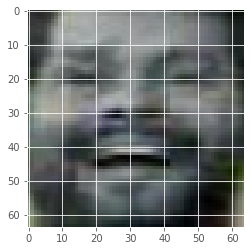

In [30]:
plt.imshow(images[0])

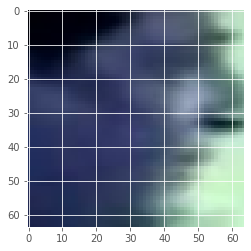

In [31]:
plt.imshow(images[50])

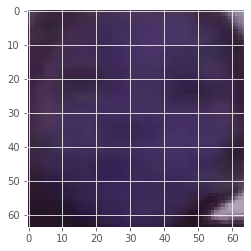

In [32]:
plt.imshow(images[500])

In [0]:
images_test=[]

for i in test_images:
  image=cv2.imread(filepath_test+i)
  image=cv2.resize(image , (64,64))
  images_test.append(image) 

In [0]:
images = np.array(images, dtype="float") / 255.0
images_test = np.array(images_test, dtype="float") / 255.0
labels = np.array(labels)

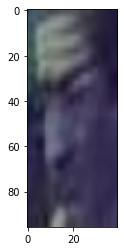

In [0]:
plt.imshow(images_test[0])

In [0]:
(trainX, testX, trainY, testY) = train_test_split(images,labels, test_size=0.30, random_state=6)

In [0]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [38]:
lb.classes_

array(['MIDDLE', 'OLD', 'YOUNG'], dtype='<U6')

In [39]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = "same", activation ='relu', input_shape = (64,64,3)))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# softmax classifier
model.add(Dense(3,activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 64)       

In [0]:
INIT_LR = 0.001 
EPOCHS = 50 #30
BS = 64

opt=Adam(lr=INIT_LR)

model.compile(loss="categorical_crossentropy", optimizer=opt,	metrics=["accuracy"])

In [0]:
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,horizontal_flip=True, fill_mode="nearest")

In [42]:
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,epochs=EPOCHS)

Epoch 1/50
217/217 [==============================] - 23s 108ms/step - loss: 1.1613 - accuracy: 0.5340 - val_loss: 1.1742 - val_accuracy: 0.3155
Epoch 2/50
217/217 [==============================] - 22s 100ms/step - loss: 0.9311 - accuracy: 0.5986 - val_loss: 0.9905 - val_accuracy: 0.5668
Epoch 3/50
217/217 [==============================] - 22s 100ms/step - loss: 0.8228 - accuracy: 0.6350 - val_loss: 0.7087 - val_accuracy: 0.6971
Epoch 4/50
217/217 [==============================] - 22s 99ms/step - loss: 0.7789 - accuracy: 0.6569 - val_loss: 0.7456 - val_accuracy: 0.6705
Epoch 5/50
217/217 [==============================] - 22s 100ms/step - loss: 0.7441 - accuracy: 0.6689 - val_loss: 0.6758 - val_accuracy: 0.7153
Epoch 6/50
217/217 [==============================] - 21s 98ms/step - loss: 0.7201 - accuracy: 0.6826 - val_loss: 0.6781 - val_accuracy: 0.7192
Epoch 7/50
217/217 [==============================] - 21s 98ms/step - loss: 0.6985 - accuracy: 0.6943 - val_loss: 0.6812 - val_accur

In [43]:
predictions = model.predict(testX, batch_size=BS)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1), target_names=lb.classes_))

              precision    recall  f1-score   support

      MIDDLE       0.85      0.87      0.86      3183
         OLD       0.86      0.53      0.65       692
       YOUNG       0.81      0.88      0.84      2097

    accuracy                           0.83      5972
   macro avg       0.84      0.76      0.78      5972
weighted avg       0.83      0.83      0.83      5972



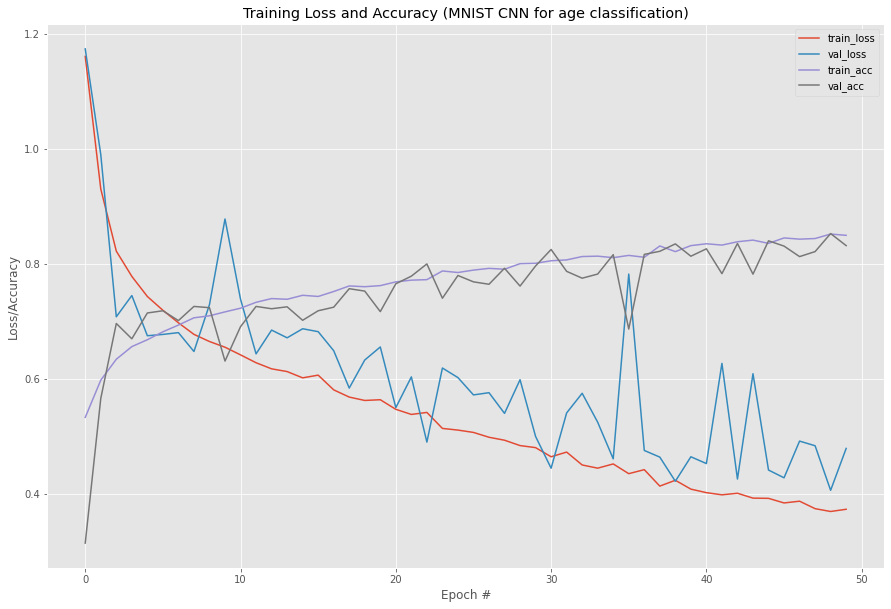

In [44]:
# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=(15,10))
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (MNIST CNN for age classification)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [46]:
pred=model.predict(images_test)
correct_pred=pred.argmax(axis=1)
(classes[correct_pred[5]])

MIDDLE


In [54]:
output=[]
for i in correct_pred:
  output.append(classes[i])
sub_id=pd.read_csv(filepath_sub)
print(sub_id)

       Class         ID
0     MIDDLE  25321.jpg
1     MIDDLE    989.jpg
2     MIDDLE  19277.jpg
3     MIDDLE  13093.jpg
4     MIDDLE   5367.jpg
...      ...        ...
6631  MIDDLE   1876.jpg
6632  MIDDLE  14940.jpg
6633  MIDDLE   3638.jpg
6634  MIDDLE    376.jpg
6635  MIDDLE   9357.jpg

[6636 rows x 2 columns]


In [0]:
df_sub=pd.DataFrame({'Class':output,'ID':sub_id['ID']})
model.save_weights('agecl_model.h5')
df_sub.to_csv('submission.csv',index=False)
from google.colab import files
files.download('submission.csv')
files.download('agecl_model.h5')